# Урок 7. Классификация с помощью KNN. Кластеризация K-means

## Выполнил - Колеганов Н.Д.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Задание

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов. 
2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

## РЕШЕНИЯ

**К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.**

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [3]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [7]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            distance = e_metrics(x, x_train[i])                  
            test_distances.append((distance, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Присваивание весов
        # weight = 1/(distance + 0.01)
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1./(d[0] + 0.01)
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [9]:
def get_graph(X_train, y_train, y_pred, y_test, k):
    cmap = ListedColormap(['red', 'green', 'blue'])
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k} и точности = {accuracy(y_pred, y_test):.3f}")
    plt.show()

In [10]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)

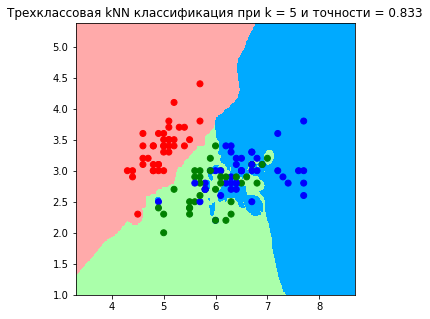

In [11]:
get_graph(X_train, y_train, y_pred, y_test, k)

**Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).**

In [12]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

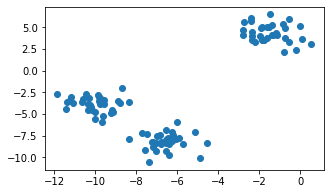

In [13]:
plt.figure(figsize=(5,3))
plt.scatter(X[:, 0], X[:, 1]);

In [14]:
def kmeans(data, k, max_iterations, min_mse):

    classes = {i: [] for i in range(k)}
    inter_metrics = {i: [] for i in range(k)}
    centroids = [data[i] for i in range(k)]
    dist_array = []
    
    for _ in range(max_iterations):
        
        for x in data:

            distances = [e_metrics(x, centroid) for centroid in centroids]
            dist = min(distances)
            classification = distances.index(dist)
            classes[classification].append(x)
            inter_metrics[classification].append(dist**2)
            dist_array.append(dist)

        old_centroids = centroids.copy()

        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)

        optimal = True

        mse_ = 0

        for centroid in range(len(centroids)):
            mse_ += np.sum(inter_metrics[centroid])/len(inter_metrics[centroid])

        if mse_ > min_mse:
            optimal = False

        if optimal:
            break
   
    return old_centroids, classes, mse_

In [15]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'brown', 'purple', 'orange', 'gray']
    
    plt.figure(figsize=(7,7))
    
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

Для понимания порядка величины min_mse определим сумму дисперсий по датасету

In [16]:
std_sum = 0
for i in range(X.shape[1]):
    std_sum += (np.std(X[:,i]))**2
std_sum

41.18153777704471

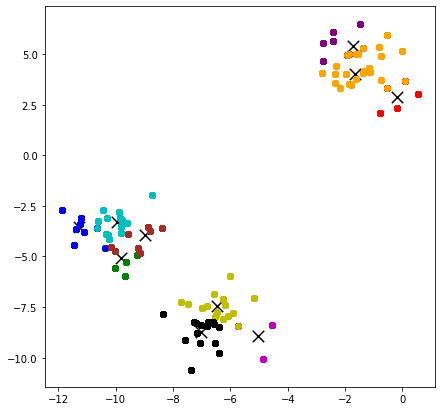

In [17]:
max_iterations = 50
min_mse = 5
mse_array = []

for k in range(1,11):
    centroids, clusters, mse_ = kmeans(X, k, max_iterations, min_mse)
    mse_array.append(mse_)

visualize(centroids, clusters)

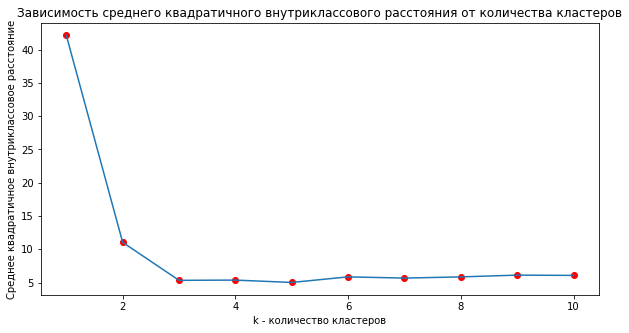

In [18]:
plt.figure(figsize=(10,5))
plt.plot([k for k in range(1,11)], mse_array)
plt.scatter([k for k in range(1,11)], mse_array, c='r')
plt.xlabel('k - количество кластеров')
plt.ylabel('Cреднее квадратичное внутриклассовое расстояние')
plt.title('Зависимость среднего квадратичного внутриклассового расстояния от количества кластеров')
plt.show()